# Problem 0: Word embeddings++ (15%)

### This is an open ended expercise. Our goal is to create a robust set of embeddings by combining many of the techniques that we have learned so far. 

## Part I: Create the embeddings by using techniques such as text cleaning using regex, stemming, ngramming, TfIdf, or whatever else you think may yield good embeddings. (Hint: you may want to consider preserving case information for better entity handling)

In [7]:
# your code here
import pandas as pd
import numpy as np
import re

wiki_df = pd.read_csv('/Users/mac/Desktop/MFin Materials/15.S08/data/kdwd_r1k_articles.csv')
wiki_df.head()

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."
2,2400,Advanced Micro Devices,40665,"Advanced Micro Devices, Inc. (AMD) is an Ameri..."
3,2439,Anthem,2967,An anthem is a musical composition of celebrat...
4,6690,Coca-Cola,457810,"Coca-Cola, or Coke, is a carbonated soft drink..."


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
vectorizer = CountVectorizer()
# Embeddings #1
word_vector = vectorizer.fit_transform(wiki_df['intro_text'].tolist())

vocab = {token: n for n, token in enumerate(pd.Series(vectorizer.vocabulary_).sort_values().index)}
inv_vocab = {v: k for k, v in vocab.items()}
word_vector

<761x10263 sparse matrix of type '<class 'numpy.int64'>'
	with 58990 stored elements in Compressed Sparse Row format>

In [31]:
vectorizer_tf = TfidfVectorizer()
# Embeddings #2
word_vector_tf = vectorizer_tf.fit_transform(wiki_df['intro_text'].tolist())

vocab_tf = {token: n for n, token in enumerate(pd.Series(vectorizer.vocabulary_).sort_values().index)}
inv_vocab_tf = {v: k for k, v in vocab.items()}
word_vector_tf

<761x10263 sparse matrix of type '<class 'numpy.float64'>'
	with 58990 stored elements in Compressed Sparse Row format>

In [33]:
# Embeddings #2
sim_mat = cosine_similarity(word_vector_tf)
sim_mat.shape

(761, 761)

In [35]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=6006)

# Embeddings #3
trafo_sim_mat = svd.fit_transform(sim_mat)
trafo_sim_mat.shape

(761, 300)

## Part II: Think about how we can evaluate our embeddings and compare them to simpler techniques covered in class. (Hint: some basic word statistics and examples can go a long way here)

First, we can compare size of memory each embeddings take up.

In [38]:
# your code here
print('Word Vector Based on Counting:',word_vector.data.nbytes/1024,'KB')
print('Word Vector Based on TF-Idf:',word_vector_tf.data.nbytes/1024,'KB')
print('Similarity Matrix:',sim_mat.data.nbytes/1024,'KB')
print('Truncated Similarity Matrix:',trafo_sim_mat.data.nbytes/1024,'KB')

Word Vector Based on Counting: 460.859375 KB
Word Vector Based on TF-Idf: 460.859375 KB
Similarity Matrix: 4524.3828125 KB
Truncated Similarity Matrix: 1783.59375 KB


Although Similarity Matrix and Truncated Similarity Matrix are smaller is their shape, they actually takes up more memory than word vector.

Then we look at the range of data in different embeddings.

In [41]:
print('Word Vector Based on Counting: from',word_vector.min(),'to', word_vector.max())
print('Word Vector Based on TF-Idf: from',word_vector_tf.min(),'to', word_vector_tf.max())
print('Similarity Matrix: from',sim_mat.min(),'to', sim_mat.max())
print('Truncated Similarity Matrix: from',trafo_sim_mat.min(),'to', trafo_sim_mat.max())

Word Vector Based on Counting: from 0 to 50
Word Vector Based on TF-Idf: from 0.0 to 0.845579623934829
Similarity Matrix: from 0.0 to 1.000000000000001
Truncated Similarity Matrix: from -0.5237814965358817 to 3.2759690858042623


Data from word vector based on Tf-Idf and similarity matrix are strictly bounded by $[0, 1]$, which is good for furhter machine learning applications. Truncated similarity matrix and word vector based on counting do not share the property.

Finally, we can see the word similarity by looking at specific examples.

In [52]:
token = 'Microsoft'
inv_vocab = wiki_df['page_title'].to_dict()
vocab = {value: key for key, value in inv_vocab.items()}
print('Word Vector Based on Counting:\n')
similarity_matrix = cosine_similarity(word_vector)
for idx, row in pd.Series(similarity_matrix[vocab[token]]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

Word Vector Based on Counting:

1.000 Microsoft
0.783 Berkshire Hathaway
0.780 Apple Inc.
0.760 IBM
0.754 Philip Morris International
0.754 Xerox
0.750 Target Corporation
0.744 Intel
0.743 Sysco
0.741 Exelixis


In [53]:
print('Word Vector based on Tf-Idf:\n')
similarity_matrix = cosine_similarity(word_vector_tf)
for idx, row in pd.Series(similarity_matrix[vocab[token]]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

Word Vector based on Tf-Idf:

1.000 Microsoft
0.328 Xerox
0.308 Apple Inc.
0.253 Citrix Systems
0.225 Intel
0.220 VMware
0.213 Berkshire Hathaway
0.210 IBM
0.196 Take-Two Interactive
0.194 Autodesk


In [54]:
print('Similarity Matrix:\n')
similarity_matrix = cosine_similarity(sim_mat)
for idx, row in pd.Series(similarity_matrix[vocab[token]]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

Similarity Matrix:

1.000 Microsoft
0.931 Apple Inc.
0.923 Xerox
0.921 Berkshire Hathaway
0.919 Citrix Systems
0.913 IBM
0.908 Sysco
0.905 Intel
0.903 Exelixis
0.901 Walmart


In [55]:
print('Truncated_Similarity Matrix:\n')
similarity_matrix = cosine_similarity(trafo_sim_mat)
for idx, row in pd.Series(similarity_matrix[vocab[token]]).sort_values(ascending=False).head(10).iteritems():
    print('%.3f' % row, inv_vocab[idx])

Truncated_Similarity Matrix:

1.000 Microsoft
0.970 Apple Inc.
0.959 Xerox
0.957 Citrix Systems
0.947 IBM
0.947 Berkshire Hathaway
0.937 Intel
0.933 Exelixis
0.930 Sysco
0.930 Walmart


# Problem 1: Metrics vs Loss functions (10%)
### As we said in lecture, we optimize (minimize) the loss function, but monitor metrics without letting the model know about their value.

### A very common loss/metric pair is crossentropy for the loss and accuracy for the metric. Often, these two numbers correlate, but they are not guaranteed to do some. 

### In this problem, you will come up with 3 sets of 20 synthetic values for predicted probability in a binary classification problem where the crossentropy and accuracy are anti correlated. Plot the loss vs the accuracy.

In [56]:
# safe to restart
import numpy as np
import pandas as pd
%pylab inline
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['svd']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    num_datapoints = predictions.shape[0]
    ce = -1 * np.sum(targets*np.log(predictions + 1e-9)) / num_datapoints
    return ce

Text(0, 0.5, 'Accuracy')

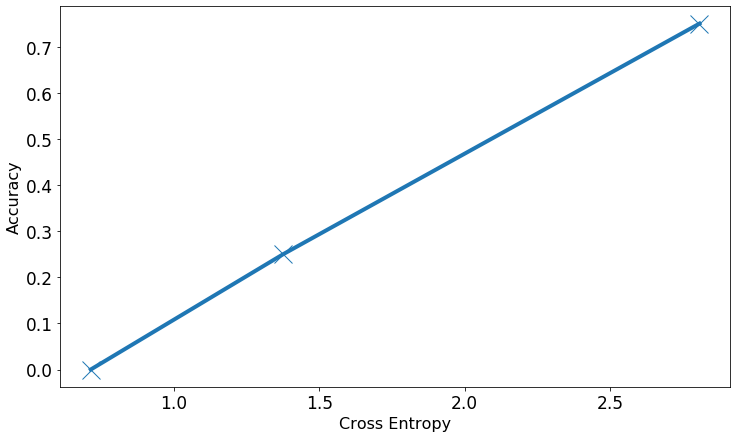

In [59]:
# Hint: not all right and wrong answers are created equally

y_true = np.array([1]*20)
predictions_1 = np.array([0.49]*20)
predictions_2 = np.array([0.51]*5+[0.2]*15)
predictions_3 = np.array([0.51]*15+[1e-4]*5)

preds = [predictions_1, predictions_2, predictions_3]

cross_entropies = [cross_entropy(y_pred, y_true) for y_pred in preds]
accuracies = [accuracy_score(y_true, y_pred > 0.5) for y_pred in preds]
pd.Series(accuracies, index=cross_entropies).plot(
    style='-x', figsize=(12,7), fontsize=17,
    markersize=18, linewidth=4
)
plt.xlabel('Cross Entropy', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Problem 2: Cross Validation (10%)


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error

Populating the interactive namespace from numpy and matplotlib


### Part 1: Generate some data
 - Generate data with 1024 points and 10 features. 
 - Create targets that are linear combinations of the 10 features and add some noise. 
 - Split the data into train/test 80/20 percent. 

In [67]:
# Generate some data
from sklearn.model_selection import train_test_split

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 0, 2, 0, 4, 0, 0])  # notice, there are zeros!
noise_amplitude = 5

num_variables = coefs.shape[0]
beta = np.array([coefs]).T

x = np.random.rand(num_observations, num_variables)
y = (x.dot(beta) + noise_amplitude * np.random.rand(num_observations, 1)).squeeze()

# x_train, x_test = ...
# y_train, y_test = ...
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# del x, y

### Part 2: cross validation
Here we will cross validate our data to find the best set of parameters for `Lasso` regression. We will tune the regularization strength (`alpha`) and whether we fit an intercept to the data. 
 - For each set of parameters find fit an estimator
 - Calculate the mean squared error on the test set
 - store the results (both the MSE and the parameters) so we can do analysis later

In [86]:
from sklearn import linear_model
alphas = [i/10 for i in range(0, 11)]
fit_intercepts = [0]*len(alphas)+[1]*len(alphas)
alphas += alphas

# everything below to be removed
# for all possible combinations, compute necessary metrics
results = {"alphas":alphas, "fit_intercepts":fit_intercepts, "MSE":[], "r2":[]}
# put code here

MSE = []
r2 = []
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha = alphas[i], fit_intercept = fit_intercepts[i])
    clf.fit(x_train, y_train)
    r2.append(clf.score(x_test, y_test))
    MSE.append(((clf.predict(x_test)-y_test)**2).mean())

results["MSE"] = MSE
results["r2"] = r2
results

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 895.0152565446207, tolerance: 5.117350828589497
  positive)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/Users/mac/opt/anaconda3

{'alphas': [0.0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  0.0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0],
 'fit_intercepts': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'MSE': [2.218026031828155,
  2.3520920302833015,
  2.523380488270361,
  2.771607207593692,
  3.088354254121453,
  3.4730167349945367,
  3.9324499590510564,
  4.46717106130991,
  5.081402815451736,
  5.76316114701956,
  6.488526525058728,
  2.0706158343241827,
  2.471326809739148,
  3.580639074821697,
  4.9476729920833735,
  5.825602676747134,
  5.944061390187684,
  5.944061390187684,
  5.944061390187684,
  5.944061390187684,
  5.944061390187684,
  5.944061390187684],
 'r2': [0.6247081014475967,
  0.6020240200303532,
  0.5730418666761414,
  0.5310416938064368,
  0.47744782306440053,
  0.41236260283831006,
  0.3346261090190249,
  0.24415084191976733,
  0.1402223046279566,
  0.024868212774885712,
  

### Part 3: Analysis
 - for each value of `fit_intercept` plot the `MSE` and `r2` scores as a function of alpha. 
 - What is the overall best combination of parameters

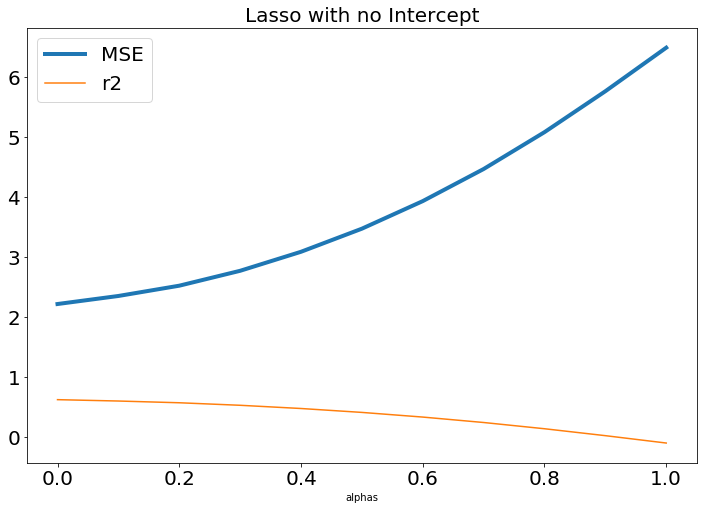

In [91]:
import matplotlib.pyplot as plt
df = pd.DataFrame(results)  # not needed, but maybe handy
# your plotting code here
df1 = df[df['fit_intercepts']==0]
df1.set_index('alphas', inplace=True)
ax = df1['MSE'].plot(figsize=(12,8), linewidth=4, markersize=14, fontsize=20)
df1['r2'].plot(ax=ax)
plt.title('Lasso with no Intercept', fontsize=20)
plt.legend(fontsize=20)
print()

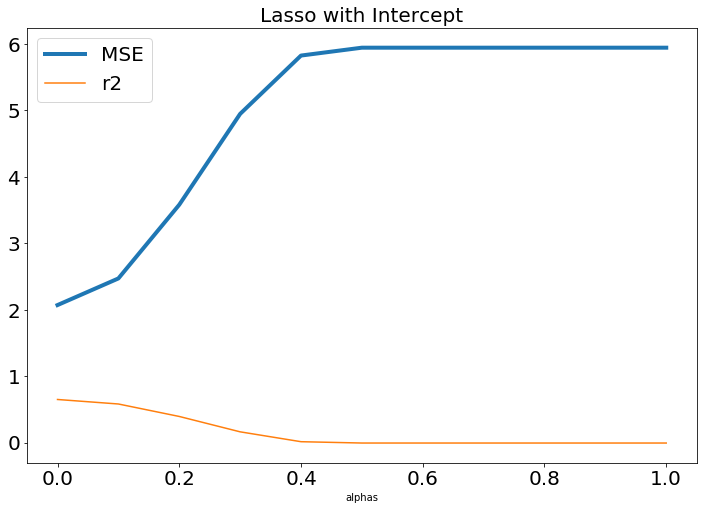

In [93]:
df2 = df[df['fit_intercepts']==1]
df2.set_index('alphas', inplace=True)
ax = df2['MSE'].plot(figsize=(12,8), linewidth=4, markersize=14, fontsize=20)
df2['r2'].plot(ax=ax)
plt.title('Lasso with Intercept', fontsize=20)
plt.legend(fontsize=20)
print()

From the result above, we know the best combination of parameters is alpha = 1.0 and `fit_intercept` = 1.

# Problem 3: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = .05

num_variables = coefs.shape[0]

x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)


# your code here, 
# split data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
x_train.shape, y_train.shape

((819, 7), (819,))

In [4]:
# fit linear regression here and calculate MSE
# put code here
reg = LinearRegression()
reg.fit(x_train, y_train)
((reg.predict(x_test)-y_test)**2).mean()

0.0002028640553551475

In [5]:
# Show that the coefficients are all close the "real" ones used to generate the data
# put code here
reg.coef_ - coefs

array([-0.00116553,  0.00115276, -0.00044214,  0.00130939,  0.00250907,
       -0.00157518, -0.00034918])

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [18]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

# inputs = Input(shape=(1,))
# preds = Dense(1,activation='linear')(inputs)

# model = Model(inputs=inputs,outputs=preds)
# sgd=keras.optimizers.SGD()
# model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# model.fit(x,y, batch_size=1, epochs=30, shuffle=False)
# Now we will use keras to solve the same problem 
input_data = Input(shape=(coefs.shape[0],))
preds = Dense(1, activation='linear')(input_data)
# add model definition here

NameError: name 'coefs' is not defined

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

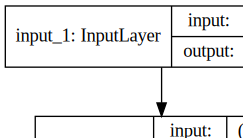

In [8]:
# K.clear_session()
# build model here
keras_lin_reg = Model(inputs=input_data, outputs=preds)
sgd=SGD()
# don't forget to compile model here
keras_lin_reg.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# plot the model
plot_model_in_notebook(keras_lin_reg)

## How many parameters does the model have? 
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [10]:
# ADD CODE HERE
num_params = coefs.shape[0] + 1  # number of coefficience and intercept
assert num_params == keras_lin_reg.count_params()

## Fit the model and calculate the MSE

In [11]:
# fit the model here
keras_lin_reg.fit(x_train,y_train, batch_size=1, epochs=30, shuffle=False)

Epoch 1/30
819/819 [==============================] - 0s 334us/step - loss: 1.1695 - mse: 1.1695
Epoch 2/30
819/819 [==============================] - 0s 344us/step - loss: 0.0946 - mse: 0.0946
Epoch 3/30
819/819 [==============================] - 0s 363us/step - loss: 0.0169 - mse: 0.0169
Epoch 4/30
819/819 [==============================] - 0s 343us/step - loss: 0.0052 - mse: 0.0052
Epoch 5/30
819/819 [==============================] - 0s 357us/step - loss: 0.0020 - mse: 0.0020
Epoch 6/30
819/819 [==============================] - 0s 334us/step - loss: 8.9565e-04 - mse: 8.9565e-04
Epoch 7/30
819/819 [==============================] - 0s 342us/step - loss: 4.6900e-04 - mse: 4.6900e-04
Epoch 8/30
819/819 [==============================] - 0s 343us/step - loss: 3.0738e-04 - mse: 3.0738e-04
Epoch 9/30
819/819 [==============================] - 0s 355us/step - loss: 2.4616e-04 - mse: 2.4616e-04
Epoch 10/30
819/819 [==============================] - 0s 422us/step - loss: 2.2303e-04 - mse: 

In [17]:
((keras_lin_reg.predict(x_test).squeeze()-y_test)**2).mean()

0.00023172306973334885

## get the coefficients and compare them to the real coefficients

In [26]:
# add code here
keras_lin_reg.get_weights()[0].squeeze()-coefs

# find the coefficients and compare them to the real ones
keras_lin_coefs = keras_lin_reg.get_weights()[0].squeeze()
pd.Series(keras_lin_coefs, 
          name='keras linear coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras linear coefficients,real coefficients
0,-1.202489,-1.20
1,5.000568,5.00
2,-0.000556,0.00
3,0.219577,0.22
4,2.003040,2.00
5,-0.001337,0.00
6,3.998571,4.00


## Now we will add some regularization

In [21]:
from keras.regularizers import l1_l2
regularizer = l1_l2(l1=0, l2=.1)
# Dense(...) -> Dense(..., kernel_regularizer=regularizer)

preds_ridge = Dense(1, activation='linear', kernel_regularizer=regularizer)(input_data)

#keras_ridge_model = Model(...
keras_ridge_reg = Model(inputs=input_data, outputs=preds_ridge)
sgd=SGD()
# don't forget to compile model here
keras_ridge_reg.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

In [23]:
# fit the model and calculate the MSE
#mean_squared_error(...

keras_ridge_reg.fit(x_train,y_train, batch_size=1, epochs=30, shuffle=False)

Epoch 1/30
819/819 [==============================] - 0s 356us/step - loss: 2.6754 - mse: 1.9008
Epoch 2/30
819/819 [==============================] - 0s 336us/step - loss: 2.1187 - mse: 1.1657
Epoch 3/30
819/819 [==============================] - 0s 349us/step - loss: 2.1146 - mse: 1.1714
Epoch 4/30
819/819 [==============================] - 0s 353us/step - loss: 2.1144 - mse: 1.1803
Epoch 5/30
819/819 [==============================] - 0s 342us/step - loss: 2.1144 - mse: 1.1838
Epoch 6/30
819/819 [==============================] - 0s 343us/step - loss: 2.1144 - mse: 1.1850
Epoch 7/30
819/819 [==============================] - 0s 348us/step - loss: 2.1144 - mse: 1.1854
Epoch 8/30
819/819 [==============================] - 0s 349us/step - loss: 2.1144 - mse: 1.1856
Epoch 9/30
819/819 [==============================] - 0s 348us/step - loss: 2.1144 - mse: 1.1856
Epoch 10/30
819/819 [==============================] - 0s 347us/step - loss: 2.1144 - mse: 1.1857
Epoch 11/30
819/819 [========

In [24]:
((keras_ridge_reg.predict(x_test).squeeze()-y_test)**2).mean()

1.413923669828445

In [25]:
# find the coefficients and compare them to the real ones
keras_ridge_coefs = keras_ridge_reg.get_weights()[0].squeeze()
pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras ridge coefficients,real coefficients
0,-0.511769,-1.20
1,2.228303,5.00
2,-0.065897,0.00
3,0.279004,0.22
4,0.957788,2.00
5,0.057730,0.00
6,1.743319,4.00


In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(x_train, y_train)
pd.Series(ridge.coef_, name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,ridge coefficients,real coefficients
0,-0.508815,-1.20
1,1.971441,5.00
2,-0.039309,0.00
3,0.153691,0.22
4,0.806373,2.00
5,0.031258,0.00
6,1.579309,4.00


In [28]:
# compare coefficients from various methods
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(coefs, name='real coefs')
], axis=1)

,ridge coefs,keras L2 coefs,real coefs
0,-0.508815,-0.511769,-1.20
1,1.971441,2.228303,5.00
2,-0.039309,-0.065897,0.00
3,0.153691,0.279004,0.22
4,0.806373,0.957788,2.00
5,0.031258,0.057730,0.00
6,1.579309,1.743319,4.00


## In fact, given the zero coefficients, LASSO might have been a better model. 
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
lasso_coefs = lasso.coef_
pd.Series(lasso_coefs, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,lasso coefficients,real coefficients
0,-0.031109,-1.20
1,3.776059,5.00
2,-0.000000,0.00
3,0.000000,0.22
4,0.821852,2.00
5,0.000000,0.00
6,2.716029,4.00


In [33]:
regularizer = l1_l2(l1=0.1, l2=0)  # to be removed

preds_lasso = Dense(1, activation='linear', kernel_regularizer=regularizer)(input_data)

#keras_lasso_model = ...
keras_lasso_model = Model(inputs=input_data, outputs=preds_lasso)
sgd=SGD()
# don't forget to compile model here
keras_lasso_model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

In [34]:
keras_lasso_model.fit(x_train,y_train, batch_size=1, epochs=30, shuffle=False)

Epoch 1/30
819/819 [==============================] - 0s 346us/step - loss: 2.2106 - mse: 1.5225
Epoch 2/30
819/819 [==============================] - 0s 348us/step - loss: 1.1782 - mse: 0.3303
Epoch 3/30
819/819 [==============================] - 0s 358us/step - loss: 1.1250 - mse: 0.1965
Epoch 4/30
819/819 [==============================] - 0s 386us/step - loss: 1.1145 - mse: 0.1564
Epoch 5/30
819/819 [==============================] - 0s 401us/step - loss: 1.1118 - mse: 0.1415
Epoch 6/30
819/819 [==============================] - 0s 387us/step - loss: 1.1111 - mse: 0.1351
Epoch 7/30
819/819 [==============================] - 0s 348us/step - loss: 1.1108 - mse: 0.1322
Epoch 8/30
819/819 [==============================] - 0s 360us/step - loss: 1.1108 - mse: 0.1308
Epoch 9/30
819/819 [==============================] - 0s 344us/step - loss: 1.1107 - mse: 0.1301
Epoch 10/30
819/819 [==============================] - 0s 348us/step - loss: 1.1107 - mse: 0.1298
Epoch 11/30
819/819 [========

In [37]:
keras_lasso_coefs = keras_lasso_model.get_weights()[0].squeeze()

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# compare all the coefficients
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(lasso.coef_, name='lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
    pd.Series(lin_reg.coef_, name='ols coefs'),
    pd.Series(coefs, name='real coefs'),
], axis=1)

,ridge coefs,keras L2 coefs,lasso coefs,keras L1 coefs,ols coefs,real coefs
0,-0.508815,-0.511769,-0.031109,-0.601770,-1.201166,-1.20
1,1.971441,2.228303,3.776059,4.397878,5.001153,5.00
2,-0.039309,-0.065897,-0.000000,-0.002434,-0.000442,0.00
3,0.153691,0.279004,0.000000,0.007044,0.221309,0.22
4,0.806373,0.957788,0.821852,1.426185,2.002509,2.00
5,0.031258,0.057730,0.000000,0.003806,-0.001575,0.00
6,1.579309,1.743319,2.716029,3.347537,3.999651,4.00


## Comment on the results

In general, OLS coefficients are the closest to real coefficients.\
Lasso regression generally gets better result compared to OLS ridge regression when the coefficients are 0.\
The results from keras and scikit learn are different mainly because differences in optimization methods.

In [ ]:
# Safe to restart here

# Problem 4: Custom Loss Functions (10%)
### In this problem we will explore the use of custom loss function to better capture desired behavior in a model.
### In particular, we will examine the tradeoff between false positives and true positives

In [ ]:
# safe to restart here

In [1]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
# Insert necessary imports here

Populating the interactive namespace from numpy and matplotlib


## Part 0: Data preparation
 - ### Load the `mnist` data and subset the data only to the classes `4` and `9`
 - ### This way we have a binary classification task for simplicity

In [2]:
from keras.utils import to_categorical
from keras.datasets import mnist

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    # insert code here:
    # new_x should be x where y is either 4 or 9
    # new_y should be true if y == 4 and False is y = 9
    
    indices = (y==4)+(y==9)
    new_x = x[indices, :]
    new_y = y[indices]
    
    new_y = (new_y < 9).astype(np.float32)
    
    return new_x, new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)


x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

print(x_test.shape)

Using TensorFlow backend.


(1991, 784)


(1991, 784)

## Part 1: fit logistic regression in `scikit-learn` and compute the true positive and false positive rates

In [3]:
%%time
# insert code here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

Wall time: 1.08 s


LogisticRegression(solver='liblinear')

In [4]:
y_pred = lr.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)

In [6]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [5]:
# put your code here
total_predicted_pos = y_pred.sum()
total_true_pos = y_test.sum()
correct_predicted_pos = (y_pred&y_test).sum()

total_predictions = y_pred.shape[0]

tpr =  (y_pred&y_test).sum()/total_predictions
fpr =  (y_pred&(1-y_test)).sum()/total_predictions
fnr =  ((1-y_pred)&y_test).sum()/total_predictions
tnr =  ((1-y_pred)&(1-y_test)).sum()/total_predictions
print('false positive rate {:.3f}'.format(fpr))
print('false negative rate {:.3f}'.format(fnr))

false positive rate 0.015
false negative rate 0.013


In [131]:
tpr+tnr

0.9718734304369664

## Part 2: A custom loss function
### Write a function that returns a custom loss function
### As a shortcut, we can modify the loss function to be
### $J(\theta )$=`regular crossentropy `  $\times$  $\alpha$ 

### where 
 - ### $\alpha=$ 1 + `weight_factor` (a number greater than 0) for the positive class (`y=1`)
 - ### $\alpha=$ `1` for the negative class (`y=0`)

### Like this we can over weight how much we care about positive examples. 

# $ \\ $
## Function
### Inputs:
 - ### `weight_factor`: the multiplicative factor for how much to weight errors in the `1` class over `0`

### Output:
 - ### a function that has inputs `(y_true, y_pred)` that is a viable keras loss function. 


In [20]:
from keras.objectives import binary_crossentropy
# def get_loss_function(weight_factor):
#     def my_cross_entropy(y_true, y_pred):
#         #insert code here
#         alpha = y_pred * weight_factor + 1
#         y_pred = K.clip(y_pred, 1e-12, 1. - 1e-12)
# #         num_datapoints = y_pred.shape[0]
        
#         ce = -1 * K.mean(y_true*K.log(y_pred + 1e-9)*alpha)
#         return ce
#     return my_cross_entropy

def get_loss_function(weight_factor):
    def my_cross_entropy(y_true, y_pred):
        #insert code here
        b_ce = binary_crossentropy(y_true, y_pred)
        
        # Apply the weights
        weight_vector = y_true * (1+weight_factor) + (1. - y_true)
        weighted_b_ce = weight_vector * b_ce

        # Return the mean error
        return K.mean(weighted_b_ce)
    return my_cross_entropy

In [21]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    num_datapoints = predictions.shape[0]
    ce = -1 * np.sum(targets*np.log(predictions + 1e-9)) / num_datapoints
    return ce

In [22]:
# test
import tensorflow as tf
np.random.seed(1)
new_loss = get_loss_function(0)
y1 = np.random.randn(30)
y2 = np.random.randn(30)
print(new_loss(y2, y1))
print(cross_entropy(y1, y2))

tf.Tensor(6.12747, shape=(), dtype=float32)
2.637912201205638


## Part 3: Fit Models with Different `weight_factors`
## Steps
 - ### For values in `np.linspace(0, 20, 50)` fit logistic regression in keras.
 - ### For each model compute the true positive and false positive rate
 - ### Make a plot of true positives and false positives as a function of `weight_factor`
 - ### Make a plot of true positives as a function of false positives

In [3]:
import keras.backend as K
from keras.optimizers import Adam

res = {}

WT = []
Tpr = []
Fpr = []
y_train = y_train.astype(np.float32)

for wt in np.linspace(0, 20, 50):
    K.clear_session()
    digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
    output = Dense(1, activation='sigmoid')(digit_input)

    model = Model(inputs=digit_input, outputs=output)
    loss_function = get_loss_function(wt)
    model.compile(optimizer = 'rmsprop', loss = loss_function) 

    
    model.fit(x_train, y_train, batch_size=1, epochs=5, shuffle=False)
    
    # calculate metrics here and save them in `res`
    y_pred = model.predict(x_test).squeeze()
    y_pred = (y_pred > 0.5).astype(int)
    y_test = (y_test > 0.5).astype(int)

    total_predictions = y_pred.shape[0]

    tpr =  (y_pred&y_test).sum()/total_predictions
    fpr =  (y_pred&(1-y_test)).sum()/total_predictions

    WT.append(wt)
    Tpr.append(tpr)
    Fpr.append(fpr)

Using TensorFlow backend.


NameError: name 'y_train' is not defined

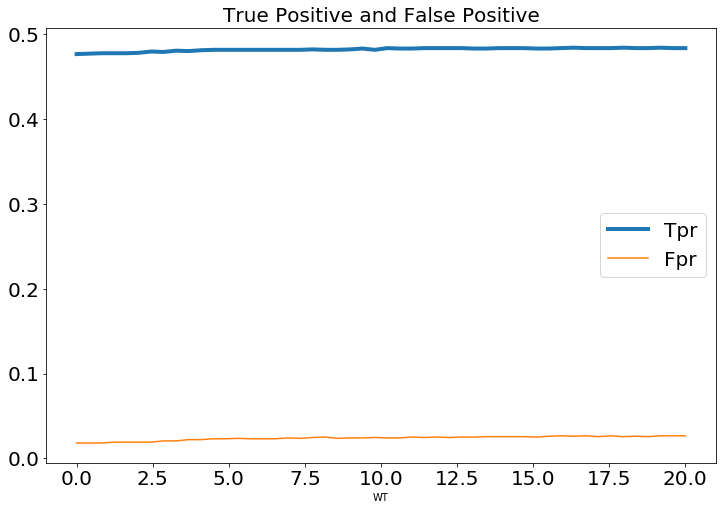

In [198]:
# put plotting code here
# true positive and false positives as a function of wt
res = {"WT":WT, "Tpr": Tpr, "Fpr": Fpr}
df = pd.DataFrame(res)
df.set_index("WT", inplace=True)
ax = df['Tpr'].plot(figsize=(12,8), linewidth=4, markersize=14, fontsize=20)
df['Fpr'].plot(ax=ax)
plt.title('True Positive and False Positive', fontsize=20)
plt.legend(fontsize=20)
print()

In [200]:
import matplotlib.pyplot as plt

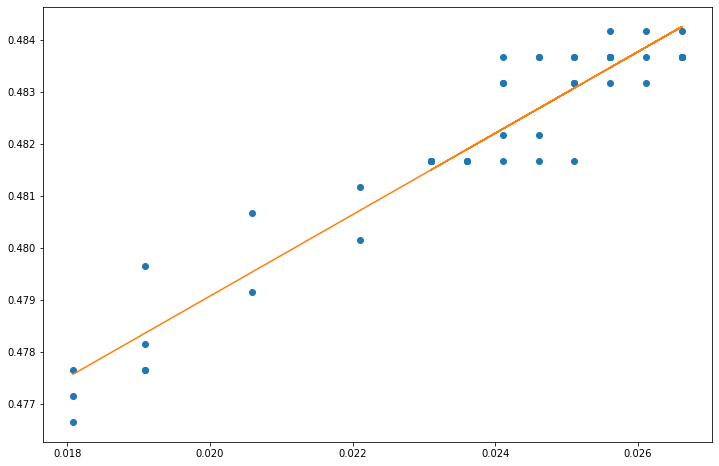

In [242]:
# true positives as a function of false positives
x = np.array(df['Fpr'])
y = np.array(df["Tpr"])
m, b = np.polyfit(x, y, 1)
plt.plot(df['Fpr'], df["Tpr"], 'o')
plt.plot(x, m*x+b)
plt.rcParams["figure.figsize"] = (15,8)
# plt.margins(-0.25)
plt.show()

## Part 4: Thresholding vs Loss Function
### What is the difference between using regular crossentropy and changing thresholds vs changing the loss function? 
### Typically, we consider anything with a predicted probability of 0.5 or above to be a positive example. What if we change this number?

## Steps:
 - ### Fit logistic regression in keras with the regular (crossentropy) loss function
 - ### Find the false positive and true positive rates as a function of the `threshold` for which we consider a positive example. 
 - ### Make a plot of false positives as a function of true positives for this thresholding method.
 - ### On the same axes, plot the old curve of false positives as a function of true positives
 - ### Comment on what you find- what are the advantages and disadvantages of these two methods.

In [2]:
K.clear_session()
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
# your code goes here
output = Dense(1, activation='sigmoid')(digit_input)

model = Model(inputs=digit_input, outputs=output)

model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy")  

model.fit(x_train, y_train, batch_size=1, epochs=5, shuffle=False)

NameError: name 'K' is not defined

In [1]:
pred_proba = model.predict(x_test).squeeze()
total_predictions = pred_proba.shape[0]
Tpr_new = []
Fpr_new = []
thresholds = []
for threshold in np.linspace(0.01, 0.099, 50):
    y_pred = (pred_proba > threshold).astype(int)
    tpr =  (y_pred&y_test).sum()/total_predictions
    fpr =  (y_pred&(1-y_test)).sum()/total_predictions
    Tpr_new.append(tpr)
    Fpr_new.append(fpr)
    thresholds.append(threshold)

result_all = {"Threshold": thresholds, "Tpr_new": Tpr_new, "Fpr_new": Fpr_new}

NameError: name 'model' is not defined

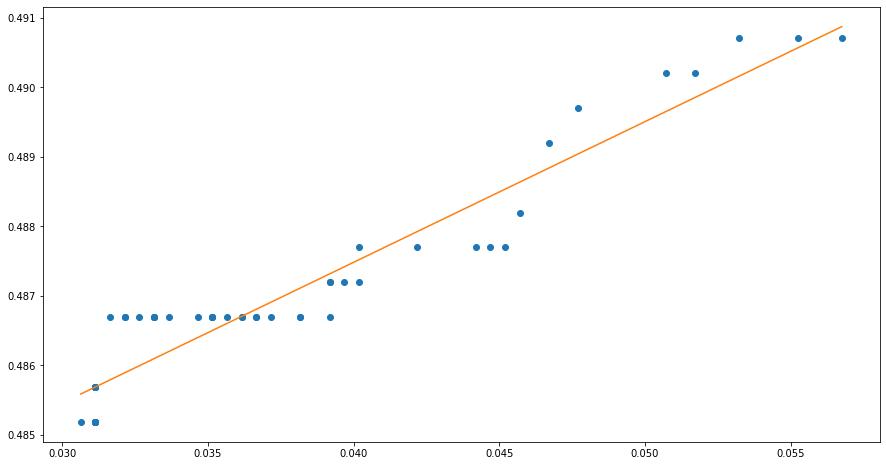

In [243]:
# your code here
df_new = pd.DataFrame(result_all)
x2 = np.array(df_new['Fpr_new'])
y2 = np.array(df_new["Tpr_new"])
m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(df_new['Fpr_new'], df_new["Tpr_new"], 'o')
plt.plot(x2, m2*x2+b2)
plt.rcParams["figure.figsize"] = (15,8)
# plt.margins(-0.25)
plt.show()

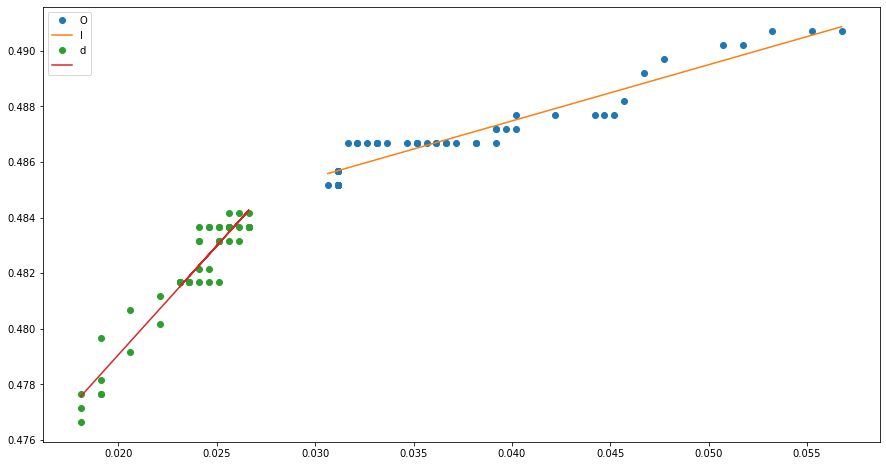

In [248]:
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
df_new = pd.DataFrame(result_all)
x2 = np.array(df_new['Fpr_new'])
y2 = np.array(df_new["Tpr_new"])
m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(df_new['Fpr_new'], df_new["Tpr_new"], 'o')
plt.plot(x2, m2*x2+b2)
plt.legend("New Result")
plt.plot(df_new['Fpr'], df_new["Tpr"], 'o')
plt.plot(x, m*x+b)
plt.legend("Old Result")
plt.rcParams["figure.figsize"] = (15,8)
# plt.margins(-0.25)
plt.show()

In [ ]:
# comments here

In [ ]:
# safe to restart

# Problem 5: Custom Regularization (15%)

In [249]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
# necessary imports here

Populating the interactive namespace from numpy and matplotlib


In [250]:
np.random.seed(1234)
n_points = 2048

x = np.vstack([np.random.randn(n_points) + ii for ii in np.arange(-3, 3)]).T
real_coefs = np.array([1.4, 0.9, .1, -3, 2.2, -1.3])
y = x.dot(real_coefs) + .5 * np.random.randn(n_points)

In [251]:
x.shape

(2048, 6)

Text(0, 0.5, 'counts')

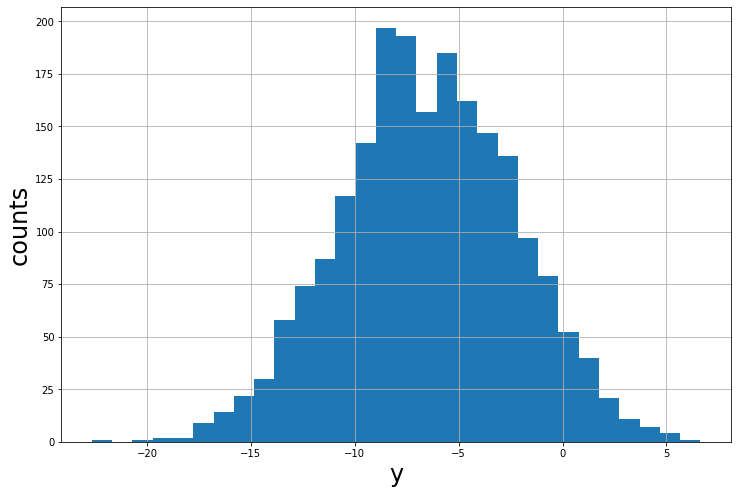

In [252]:
pd.Series(y).hist(bins=30, figsize=(12,8))
plt.xlabel('y', fontsize=24)
plt.ylabel('counts', fontsize=24)

## A new regularization
Sometimes, in the social science and in low-data situations a good rule of thumb is that instead of doing linear regression to find the coefficients, we can assume that all the coefficients are the same!

We will implement a variation on this by penalizing the `variance` of the coefficients, instead of the size.

__NOTE__: this is not a good thing to do in this situation- we have coefficients of different sign!

In this problem we will first solve linear regression with keras. Then we will add a custom regularizer to penalize the variance, and see what the effect are. 

# $ \\ $
# $ \\ $
## Part 0: Solve the problem with no regularization
### Steps:
 - ### Partition the data into train/test
 - ### Fit linear regression in keras with no regularization
 - ### Find the `mse` for the test set this model
 - ### Examine the coefficients and make sure they look correct

In [253]:
# partition the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [260]:
# fit the data 
K.clear_session()
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
output = Dense(1, activation='linear')(digit_input)

model = Model(inputs=digit_input, outputs=output)
model.compile(optimizer = 'rmsprop', loss = "MSE")


model.fit(x_train, y_train, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
1638/1638 [==============================] - 1s 354us/step - loss: 22.4284
Epoch 2/10
1638/1638 [==============================] - 1s 335us/step - loss: 6.8461
Epoch 3/10
1638/1638 [==============================] - 1s 332us/step - loss: 2.8407
Epoch 4/10
1638/1638 [==============================] - 1s 331us/step - loss: 0.8111
Epoch 5/10
1638/1638 [==============================] - 1s 329us/step - loss: 0.3162
Epoch 6/10
1638/1638 [==============================] - 1s 331us/step - loss: 0.2762
Epoch 7/10
1638/1638 [==============================] - 1s 330us/step - loss: 0.2699
Epoch 8/10
1638/1638 [==============================] - 1s 333us/step - loss: 0.2659
Epoch 9/10
1638/1638 [==============================] - 1s 332us/step - loss: 0.2628
Epoch 10/10
1638/1638 [==============================] - 1s 332us/step - loss: 0.2601


In [261]:
from sklearn.metrics import mean_squared_error
# calculate MSE
y_pred = model.predict(x_test).squeeze()
mean_squared_error(y_test, y_pred)

0.28403194454061714

In [262]:
# examine coefs and make sure they look right
model.get_weights()[0].squeeze()

array([ 1.33531   ,  0.87369984,  0.0648111 , -2.971403  ,  2.2278516 ,
       -1.2644585 ], dtype=float32)

In [259]:
real_coefs

array([ 1.4,  0.9,  0.1, -3. ,  2.2, -1.3])

## Part 1: Add Regularization
## Steps:
 - ### Make a function that given a `weight_factor` returns a well-formed keras regularization function that penalizes the variance of coefficients by this factor. 
 - ### Fit a model with this regularizer with a `weight_factor` of `1.0`. 
 - ### Calculate the `mse` on the test set and examine the coefficients. 

__Note__: the coefficients should be closer together. Are they?


In [269]:
def make_reg_function(wt_factor):
    def my_reg(weight_matrix):
        # your code here
#         print(K.var(weight_matrix))
#         return wt_factor * varum(K.square(weight_matrix))
        return wt_factor * K.var(weight_matrix)
    return my_reg



In [270]:
K.clear_session()
inputs = Input(shape=(x_train.shape[1],))
# make and fit a model
my_regularizer = make_reg_function(1.0)
output = Dense(1, activation='linear',kernel_regularizer=my_regularizer)(inputs)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer = 'rmsprop', loss = "MSE")


model.fit(x_train, y_train, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
1638/1638 [==============================] - 1s 349us/step - loss: 28.5345
Epoch 2/10
1638/1638 [==============================] - 1s 337us/step - loss: 14.0712
Epoch 3/10
1638/1638 [==============================] - 1s 332us/step - loss: 8.5090
Epoch 4/10
1638/1638 [==============================] - 1s 330us/step - loss: 5.1956
Epoch 5/10
1638/1638 [==============================] - 1s 329us/step - loss: 3.6075
Epoch 6/10
1638/1638 [==============================] - 1s 339us/step - loss: 3.0446
Epoch 7/10
1638/1638 [==============================] - 1s 336us/step - loss: 2.8964
Epoch 8/10
1638/1638 [==============================] - 1s 333us/step - loss: 2.8622
Epoch 9/10
1638/1638 [==============================] - 1s 353us/step - loss: 2.8543
Epoch 10/10
1638/1638 [==============================] - 1s 361us/step - loss: 2.8525


In [271]:
# examine coefs
print(model.get_weights()[0].squeeze())
print(real_coefs)

[ 1.1591549   0.7824225   0.10224653 -2.464489    1.8455256  -1.0426867 ]
[ 1.4  0.9  0.1 -3.   2.2 -1.3]


In [272]:
# calculate MSE
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.8044350674880152

## Part 2: Turn up the Regularization
## Steps
 - ### Repeat part 1 with the weight factor turned up to many times its initial value
 - ### Calculate the `mse` on the test set
 - ### examine the coefficients and comment
 - ### compare these results to the best constant guess for `y`.

In [277]:
K.clear_session()
# make and fit a model with MUCH more regularization
inputs = Input(shape=(x_train.shape[1],))
# make and fit a model
my_regularizer = make_reg_function(100.0)
output = Dense(1, activation='linear',kernel_regularizer=my_regularizer)(inputs)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer = 'rmsprop', loss = "MSE")


model.fit(x_train, y_train, batch_size=1, epochs=20, shuffle=False)

Epoch 1/20
1638/1638 [==============================] - 1s 361us/step - loss: 41.9405
Epoch 2/20
1638/1638 [==============================] - 1s 329us/step - loss: 25.1873
Epoch 3/20
1638/1638 [==============================] - 1s 332us/step - loss: 21.8252
Epoch 4/20
1638/1638 [==============================] - 1s 330us/step - loss: 20.2107
Epoch 5/20
1638/1638 [==============================] - 1s 326us/step - loss: 19.3526
Epoch 6/20
1638/1638 [==============================] - 1s 331us/step - loss: 18.8329
Epoch 7/20
1638/1638 [==============================] - 1s 329us/step - loss: 18.4738
Epoch 8/20
1638/1638 [==============================] - 1s 330us/step - loss: 18.1993
Epoch 9/20
1638/1638 [==============================] - 1s 329us/step - loss: 17.9759
Epoch 10/20
1638/1638 [==============================] - 1s 327us/step - loss: 17.7883
Epoch 11/20
1638/1638 [==============================] - 1s 335us/step - loss: 17.6283
Epoch 12/20
1638/1638 [=============================

In [278]:
# look at the coefs
print(model.get_weights()[0].squeeze())
print(real_coefs)

[0.34369794 0.31952298 0.27221823 0.10771833 0.3534196  0.19503763]
[ 1.4  0.9  0.1 -3.   2.2 -1.3]


In [279]:
# calculate MSE
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

17.030524352597272

## This is not bad.
 - What would the MSE of the best CONSTANT guess for `y`?

In [276]:
# your code here
y_naive = y_test.mean()
y_naive = np.array([y_naive]*y_test.shape[0])
mean_squared_error(y_test, y_naive)

17.97989626455126

## Comments


When we impose an extremely large penalty on coefficient variance when training, our model performance gradually converges to best constant guess, which is the mean of sample, because coefficients are forced to be same with each other.